<p style="font-family: Arials; line-height: 2; font-size: 25px; font-weight: bold; letter-spacing: 2px; text-align: center; color:#FF00C1">Hypothesis Testing for Breast Cancer Survey</p>

![](https://images.pexels.com/photos/8385421/pexels-photo-8385421.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)

## Importing Libraries

 !pip install pingouin

In [65]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

In [19]:
df = pd.read_csv('Downloads/hyp.csv')

### First Hypothesis : "Does the Anxiety differ in terms of Marriage Status?" 
H0: There is no difference betwween Marriage Status

HA :There is difference betwween Marriage Status

Text(0.5, 1.0, 'Dist. of Anxiety Scores')

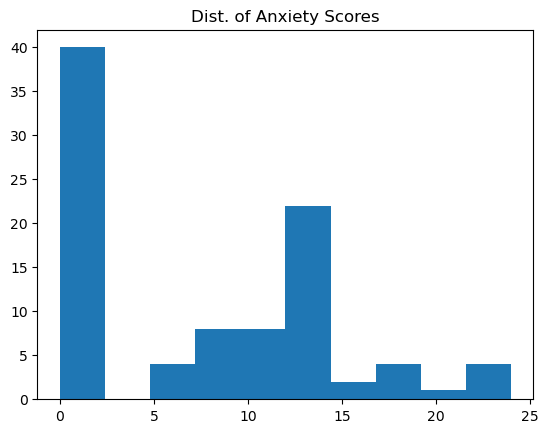

In [22]:
#Check the distribution of Anxiety Scores
plt.hist(x= 'Anxiety Score' , data =df)
plt.title('Dist. of Anxiety Scores')

 - We must remove the 0 scores

In [23]:
#Removing 0 scores
anxiety = df[df['Anxiety Score'] >0]

In [42]:
#Set the significance level
alpha = 0.05

#Generate an anova hypothesis test
anova =pg.anova(data =anxiety, dv = 'Anxiety Score',between = 'Marriage')

#Make a variable for p value
pval = hyp1['p-unc'].values

#The Result
if pval > alpha:
    print('Fail to Reject H0 - There is no difference between marriage status in anxiety.')
if pval < alpha:
    print('Reject H0 - There is no difference between marriage status in anxiety .')

Fail to Reject H0 - There is no difference between marriage status in anxiety.


- From the last output , we can see that the anxiety for breast cancer patients does not differ across the marriage status

### Second Hypothesis : "Are Anxiety and Depression independent ?" 
H0 : Anxiety and Depression are independent

HA :  Anxiety and Depression are not independent

In [43]:
#Generate a chi-square hypothesis test
expected , observed , stats = pg.chi2_independence(x = 'Depression Score' , y = 'Anxiety Score' , data= df)

#Make a variable for p value
pval1 = stats[stats['test']== 'pearson']['pval'].values


#The Result
if pval1 > alpha:
    print('Fail to Reject H0 - Anxiety and Depression are independent.')
if pval1 < alpha:
    print('Reject H0 -  Anxiety and Depression are not independent.')

Reject H0 -  Anxiety and Depression are not independent.


C:\Users\laptop\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\laptop\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\laptop\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:7169: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\laptop\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:7169: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\laptop\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:7166: RuntimeWarning: divide by zero encountered in true_divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


- There is a relationship betwwen Anxiety and depression

In [46]:
df['Age'].unique()

array([nan, '31~35', '>40', '36~40', '25~30', '18~23'], dtype=object)

### Third Hypothesis : " Is the mean stress score for the age +40 greater than who are  36~40?" 
H0 : The two means are the same


HA : The mean stress score for the age +40 greater than who are 36~40

In [69]:
#Selecting the two age groups
age = df.query("Age in ('>40' , '36~40')")
#Grouping data with mean ,standard deviation and count
xbar=age.groupby('Age')['Stress Score'].mean()
std= age.groupby('Age')['Stress Score'].std()
n =age.groupby('Age')['Stress Score'].count()

#Calculating t-score
numerator = xbar['>40'] - xbar['36~40']
denominator = np.sqrt((std['>40']**2 /n['>40'])+ (std['36~40']**2 / n['36~40']))
tscore = numerator/denominator

#Calculating degrees of freedom
dof = n['>40'] -n['36~40']

#Calculating p-value
pval2 = 1-t.cdf(tscore,df=dof)

if pval2 > alpha:
    print('Fail to Reject H0 - The two means are the same.')
if pval2 < alpha:
    print('Reject H0 -  The mean stress score for the age +40 greater than who are 36~40.')


Fail to Reject H0 - The two means are the same.


- From the t-test above , we can say that the mean of the anxiety score for the two age brackets are the same

<p style="font-family: Arials; line-height: 2; font-size: 25px; font-weight: bold; letter-spacing: 2px; text-align: center; color:#FF00C1">Thanks for reading this work!</p>